# Relu before BN and generated missclassifield images. 
## Used my own network of Assignmnet 4 ( 8372 parameters with 9948 accuracy)
### Observation - accuracy decreased  by 1 percent.



# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras
from keras import regularizers

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from matplotlib import pyplot
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets and APPLy Image normalization

In [0]:
# example of standardizing a image dataset
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
# image normalization using Image generator
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

In [72]:
trainy[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
trainy = np_utils.to_categorical(trainy, 10)
testy = np_utils.to_categorical(testy, 10)

In [74]:
trainy[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### RELu after BN




In [75]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, name ='FirstLayer', input_shape=(28,28,1))) # RF 3x3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3, name ='SecondLayer', kernel_regularizer=regularizers.l2(0.01))) # RF 5x5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(14, 3, 3, name ='ThirdLayer', kernel_regularizer=regularizers.l2(0.01))) # RF 7x7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # RF 14x14
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(12, 3, 3, name ='fourthThirdLayer', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Convolution2D(10, 3, 3, name ='FifthLayer', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 3, 3, activation='relu' , name ='SixthLayer', kernel_regularizer=regularizers.l2(0.01)))
model.add(Convolution2D(10, 3, 3, activation='relu' , name ='SeventhLayer', kernel_regularizer=regularizers.l2(0.01)))

model.add(Convolution2D(10, 1))#2

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), name="FirstLayer", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), name="SecondLayer", kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), name="ThirdLayer", kernel_regularizer=<keras.reg...)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), name="fourthThirdLayer", kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to t

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FirstLayer (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_22 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
activation_22 (Activation)   (None, 26, 26, 10)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
SecondLayer (Conv2D)         (None, 24, 24, 12)        1092      
_________________________________________________________________
batch_normalization_23 (Batc (None, 24, 24, 12)        48        
_________________________________________________________________
activation_23 (Activation)   (None, 24, 24, 12)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", name="SixthLayer", kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", name="SeventhLayer", kernel_regularizer=<keras.reg...)`


In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler ,ModelCheckpoint
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [77]:
epochs = 40
checkpoint = keras.callbacks.ModelCheckpoint('Best_Model_EVA_Asgn_5.hdf5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')

model.fit_generator(
        datagen.flow(trainX, trainy, batch_size =128 , shuffle=True),
        steps_per_epoch=int(np.ceil(len(trainX)/128)), 
        epochs = epochs, 
        validation_data=(testX, testy),
        validation_steps = int(np.ceil(len(testX)/128)),
        callbacks=[checkpoint, LearningRateScheduler(scheduler, verbose=1)],
        verbose=1)

Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/469 [==============================] - 12s 26ms/step - loss: 0.6825 - acc: 0.8679 - val_loss: 0.2914 - val_acc: 0.9615
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
469/469 [==============================] - 7s 15ms/step - loss: 0.2312 - acc: 0.9677 - val_loss: 0.2005 - val_acc: 0.9728
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
469/469 [==============================] - 7s 15ms/step - loss: 0.1854 - acc: 0.9733 - val_loss: 0.1696 - val_acc: 0.9745
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
469/469 [==============================] - 7s 15ms/step - loss: 0.1595 - acc: 0.9768 - val_loss: 0.1868 - val_acc: 0.9664
Epoch 5/40

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
469/469 [==============================] - 7s 15ms/step - loss: 0.1479 - acc: 0.9784 - val_loss: 0.

In [78]:
model_new = load_model('Best_Model_EVA_Asgn_5.hdf5')
score = model_new.evaluate(testX, testy, verbose=0)
print(score)

[0.05210519856214523, 0.9929]


In [0]:
y_pred = model.predict(testX)

In [0]:
from matplotlib import pyplot as plt

In [0]:
# function for plotting misclassified images 
def misclassified_images(X, Y, Y_pred, classes,columns=5,total=25,pick_randomly=True, image_size_multiplier=4):
    y_true = np.argmax(Y, axis=1)
    yp = np.argmax(Y_pred, axis=1)
    misclassified = y_true != yp
    X = X[misclassified]
    Y = Y[misclassified]
    Y_pred = Y_pred[misclassified]
    y_true = y_true[misclassified]
    yp = yp[misclassified]
    total = min(total, len(X))
    rows = int(np.ceil(total / columns))
    indexes = np.random.choice(len(X), total, replace=False) if pick_randomly else list(range(0, total))
    X = np.take(X, indexes, axis=0)
    Y = np.take(Y, indexes, axis=0)
    Y_pred = np.take(Y_pred, indexes, axis=0)
    y_true = np.take(y_true, indexes, axis=0)
    yp = np.take(yp, indexes, axis=0)
    fig_height = rows * image_size_multiplier * 2
    fig_width = columns * image_size_multiplier
    fig = plt.figure(figsize=(fig_width, fig_height))
    idx1 = 0
    idx2 = 0
    jdx = 0
    for row in range(rows):
        for column in range(columns):
            if idx1 >= len(X):
                break
            img = X[idx1]
            assert (len(img.shape) == 3 and img.shape[2] in [1, 3, 4]) or len(img.shape) == 2
            ax = fig.add_subplot(rows * 2, columns, jdx + 1, xticks=[], yticks=[])
            cmap = None
            if (len(img.shape) == 3 and img.shape[2] == 1) or len(img.shape) == 2:
                cmap = "binary"
            if len(img.shape) == 3 and img.shape[2] == 1:
                img = img.reshape((img.shape[0], img.shape[1]))
            ax.imshow(img, cmap=cmap)
            ax.set_title("Predicted = %s, Actual = %s" % (classes[yp[idx1]], classes[y_true[idx1]]))
            idx1 += 1
            jdx += 1

        for column in range(columns):
            if idx2 >= len(Y_pred):
                break
            yps = Y_pred[idx2]
            ax = fig.add_subplot(rows * 2, columns, jdx + 1, xticks=[], yticks=[])
            ind = np.arange(len(classes))
            rects = ax.bar(ind, yps, 0.25, label='Labels')
            ax.set_ylabel('Probability')
            ax.set_yticks(np.arange(0, 1.2, 0.2))
            #ax.set_title('Probability vs Labels')
            ax.set_xticks(ind)
            ax.set_xticklabels(classes)
            ax.legend()
            idx2 += 1
            jdx += 1
    plt.show()

In [0]:
def get_mnist_labels():
    return list(range(0, 10))

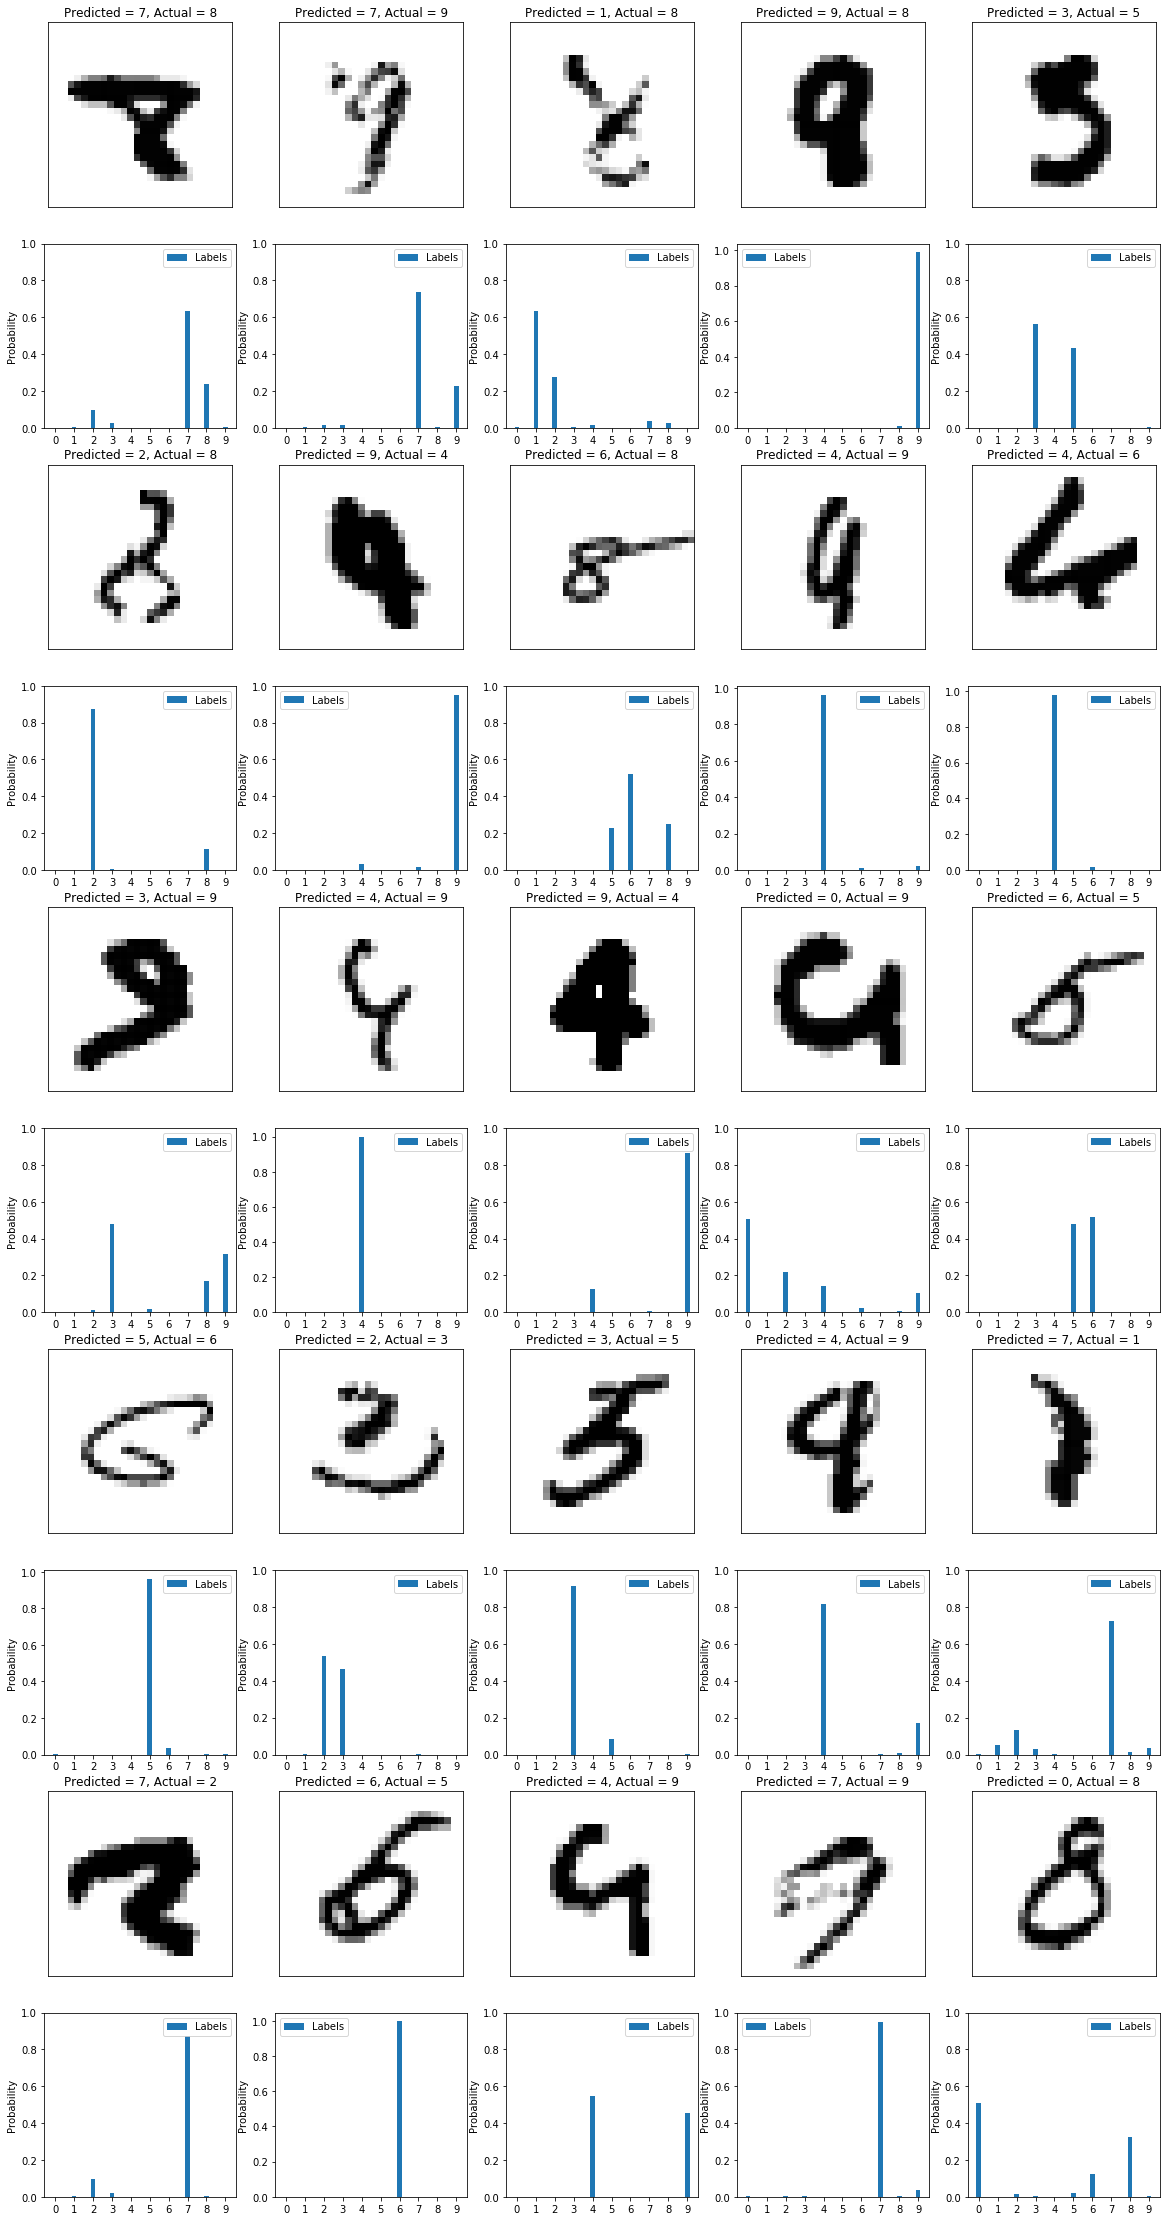

In [83]:
# 25 misclassified images
misclassified_images(testX, testy, y_pred[:len(testy)], columns=5, total=25,classes=get_mnist_labels(), pick_randomly=True, image_size_multiplier=4)

### Evaluate the model and print score

In [84]:
score = model.evaluate(testX, testy, verbose=0)
print(score)

[0.052105198860168456, 0.9929]


In [0]:
y_pred = model.predict(testX)

In [86]:
print(y_pred[:9])
print(testy[:9])

[[1.8272230e-07 3.3832464e-05 4.7142930e-05 3.5270561e-05 1.0050196e-06
  1.5856652e-07 8.2815932e-09 9.9983168e-01 3.2581149e-06 4.7433448e-05]
 [6.2641071e-04 2.8171716e-04 9.9906033e-01 1.3531929e-05 5.9162272e-07
  2.0105112e-08 8.2588958e-06 1.6851160e-06 7.3693163e-06 6.1555383e-08]
 [4.6064564e-05 9.9905962e-01 3.5116136e-05 5.3302451e-06 3.4321161e-04
  5.5175828e-05 1.4240628e-06 4.3678592e-04 1.5575099e-05 1.6462283e-06]
 [9.9895006e-01 3.1318808e-07 1.0031418e-04 5.5922428e-08 1.9422762e-06
  2.1986687e-05 6.0211873e-04 1.8746447e-06 1.5648373e-04 1.6479546e-04]
 [4.0770701e-08 3.4927802e-05 1.0604756e-05 5.8076055e-09 9.9969733e-01
  1.5276712e-06 1.8504842e-06 2.0560386e-05 3.6923896e-06 2.2953741e-04]
 [1.2393975e-05 9.9889600e-01 9.6342474e-06 2.2691320e-06 4.1359360e-04
  3.3305980e-05 4.2921064e-07 6.2306534e-04 7.2508014e-06 2.0101306e-06]
 [2.7844663e-07 2.7698998e-03 1.4916069e-06 9.9748526e-08 9.9535072e-01
  1.1811089e-04 1.2712105e-06 6.6897593e-04 1.1446674e-04 